<a href="https://colab.research.google.com/github/feteiha/ML-Course/blob/master/MNIST_CNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network Model

[Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNNs) exhibit exceptional performance, particularly for image recognition. The inpiration for CNNs comes from the visual cortex of animal brains. CNNs are space and shift invariant, which is an important property for image recognition.

This example requires Python 3, Tensorflow 2, matplotlib, and numpy. Training a CNN mode will take longer than a simpler, fully connected model, so GPU training is preferred.

In [ ]:
%tensorflow_version 2.x

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

These are some configuration parameters and hyperparameters.

In [ ]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

### Load data

Keras has a builting function for loading MNIST data and splitting it into train and test sets. x_train and x_test are arrays of train and test input images respectively. Images are represented as a 28 x 28 matrix of pixel values. y_train and y_test are train and test labels respectively.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

The following cell displays random test images to get an idea of what they look like.

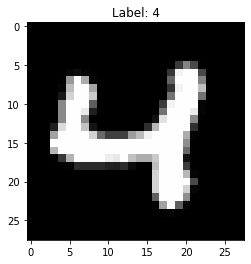

In [ ]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

In [ ]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Data Preparation

Pixel values are normalized into values ranging from 0.0 - 1.0.

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
orig_test.shape

(10000, 28, 28)

In [ ]:
K.image_data_format()

'channels_last'

### Define Model

CNNs are like two dimensional [Finite Impulse Response](https://en.wikipedia.org/wiki/Finite_impulse_response) (FIR) filters commonly used in signal processing. Models with over 100 CNN, pooling, padding, and other layers have been successfully trained to recognize complex objects as well as multiple objects in the one image.

This model uses two convolutional layers, a max pooling layer, a dense layer, and a one-hot encoded output layer. Even with these few layers, this model can achieve over 99% accuracy.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

### Train Model

This is more or less boilerplate Keras code to train the model given the training data set. Keras can also evaluate the trained model given the test data set. Matplotlib is used to plot train and test accuracy as a function of the epoch number.

Ideally, the accuracy with test and train data should be about the same. Low training accuracy means the model exhibits high bias. High bias could be caused by a weak model, not enough training examples, or too few training epochs. High train accuracy and low test accuracy is a case of high variance. This means the model is more or less "memorizing" the expected output and not generalizing well. High variance can be reduced through *regularization*.

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2323 - accuracy: 0.9294 - val_loss: 0.0552 - val_accuracy: 0.9828
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0841 - accuracy: 0.9747 - val_loss: 0.0384 - val_accuracy: 0.9871
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0541 - accuracy: 0.9837 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0292 - val_accuracy: 0.9905
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0278 - val_accuracy: 0.9907
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0274 - val_accuracy: 0.9919
Epoch 

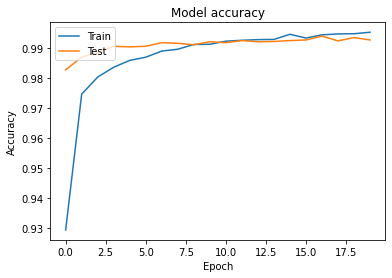

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Make Predictions

Let's make some predictions using the trained model from above. This model could have been read from a file of a previously trained model. To see an example of restoring a trained model, take a look at the [MNIST Prediction](https://github.com/msiddalingaiah/MachineLearning/blob/master/MNIST/MNIST_Prediction.ipynb) notebook.

Note that x_test has been reshaped in an earlier cell to suit this model.

In [ ]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

In [ ]:
predictions[1]

array([1.3022388e-13, 2.8630121e-11, 1.0000000e+00, 3.4768644e-17,
       8.8436334e-17, 1.9254986e-24, 1.4753460e-16, 5.6476431e-17,
       2.2653231e-17, 4.2005992e-21], dtype=float32)

In [ ]:
most_likely[1]

2

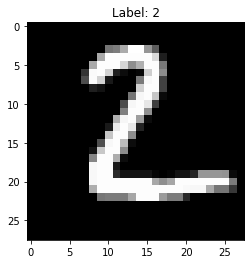

In [ ]:
plt.imshow(orig_test[1], cmap='gray')
plt.title('Label: %d' % y_test[1])
plt.show()

The following cell chooses a random test image, prints the model predicted value, expected value (label), and the original image.

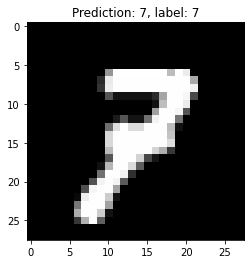

In [ ]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

### Error Analysis

The next cell looks for model predictions that specifically do not match the expected value. In some cases, even humans might disagree on what this image is.

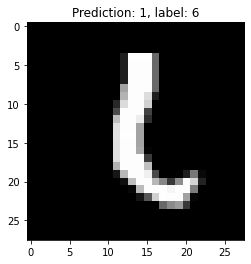

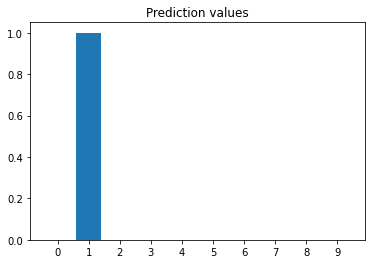

In [ ]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()